In [1]:
import os
data_file_path = "data/"

dir_list = os.listdir(data_file_path)

In [2]:
dir_list_by_parameter = list(map(lambda x: x.split(":"), dir_list))

# dir_list_by_parameter[0]
# ['g_16000', 'p_10', 'wc_10', 'gs_42', 'ss_10', 'ipmutp_0.01', 'icmutp_0.005', 'icmaxsw_5', 'ccmutp_0.01.csv']

# extract unique numbers (ipmutp) and seeds
unique_ip_mut = set()
unique_seeds = set()
for i in range(len(dir_list_by_parameter)):
  unique_ip_mut.add(dir_list_by_parameter[i][5].split("_")[1])
  unique_seeds.add(dir_list_by_parameter[i][4].split("_")[1])

print(f"{len(unique_ip_mut)}, {len(unique_seeds)}")

15, 40


In [3]:
import pandas as pd

max_iters = 1500

fdf = pd.DataFrame()
for file in dir_list:
  ip_mut = float(file.split(":")[5].split("_")[1])
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed not in [1]:
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  fdf = pd.concat((fdf, df[:max_iters]))

fdf.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut
count,22500.000000,22500.000000,22500.000000,2.250000e+04,2.250000e+04,22500.0,22500.000000
mean,749.500000,47224.212098,2790.861538,1.368269e+08,1.113143e+08,1.0,0.097067
std,433.022228,4087.559779,773.888301,4.909834e+07,3.833917e+07,0.0,0.093370
min,0.000000,39738.638477,1555.148010,6.179946e+07,6.179946e+07,1.0,0.001000
25%,374.750000,43937.582407,2056.144699,9.154585e+07,7.518664e+07,1.0,0.008000
50%,749.500000,46953.336426,2845.000277,1.360397e+08,1.085531e+08,1.0,0.080000
75%,1124.250000,49698.158231,3295.169537,1.688839e+08,1.395189e+08,1.0,0.160000
max,1499.000000,65519.978716,6863.620201,3.984736e+08,2.780830e+08,1.0,0.300000


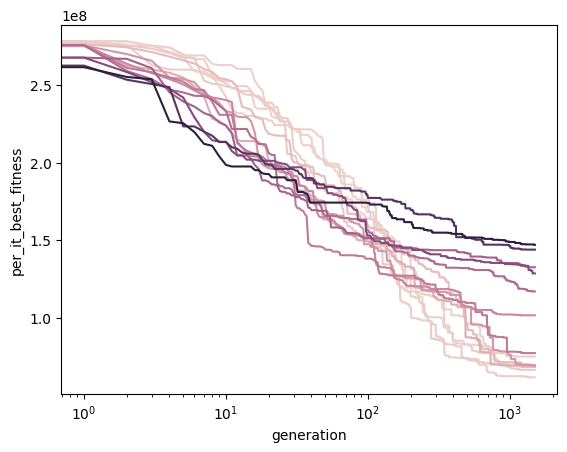

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data=fdf, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
plt.show()

fig = ax.get_figure()
fig.savefig("konvergencna_krivka.png") 


In [5]:
max_iters = 250

fdf2 = pd.DataFrame()
for file in dir_list:
  ip_mut = round(float(file.split(":")[5].split("_")[1]), 3)
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed in [43]: # remove garbage
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut
count,600.0,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000,600.000000
mean,250.0,47113.553970,2980.064183,1.436494e+08,1.225208e+08,20.500000,0.097067
std,0.0,2585.225047,640.694271,3.895291e+07,2.346531e+07,11.553028,0.093446
min,250.0,41409.493024,1811.151760,7.622890e+07,7.381391e+07,1.000000,0.001000
25%,250.0,45089.379658,2468.810839,1.118618e+08,1.058084e+08,10.750000,0.008000
50%,250.0,46811.176123,2915.127739,1.372673e+08,1.194784e+08,20.500000,0.080000
75%,250.0,48785.963922,3406.154873,1.690566e+08,1.379655e+08,30.250000,0.160000
max,250.0,56237.248892,5714.965129,2.934397e+08,2.160839e+08,40.000000,0.300000


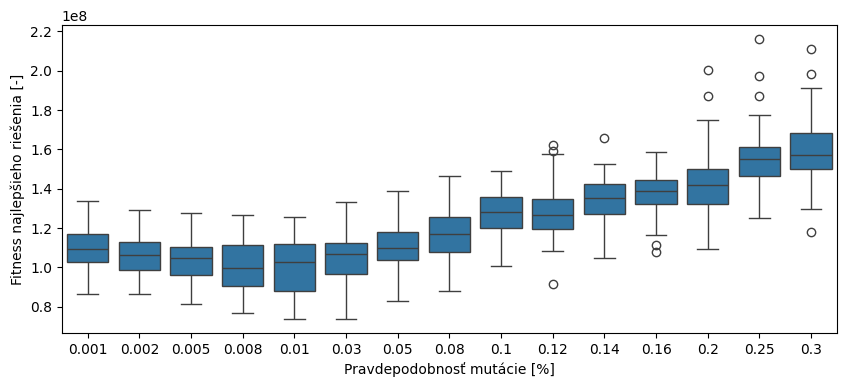

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(ax=ax, data=fdf2, x="ip_mut", y="per_it_best_fitness")
ax.set_xlabel("Pravdepodobnosť mutácie [%]")
ax.set_ylabel("Fitness najlepšieho riešenia [-]")
plt.show()

fig = ax.get_figure()
fig.savefig("boxplot_middle.png") 

In [43]:
max_iters = 1499

fdf2 = pd.DataFrame()
for file in dir_list:
  ip_mut = round(float(file.split(":")[5].split("_")[1]), 3)
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed in [43]: # remove garbage
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut
count,600.0,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000,600.000000
mean,1499.0,43906.952974,2465.946943,1.125113e+08,8.537426e+07,20.500000,0.097067
std,0.0,3175.887232,675.791574,3.950229e+07,2.359441e+07,11.553028,0.093446
min,1499.0,38090.781551,1525.709794,5.892136e+07,5.759060e+07,1.000000,0.001000
25%,1499.0,41395.849989,1894.935803,7.839238e+07,6.936311e+07,10.750000,0.008000
50%,1499.0,43255.191086,2250.569935,1.009629e+08,7.509583e+07,20.500000,0.080000
75%,1499.0,46310.120648,2974.235020,1.416592e+08,9.565392e+07,30.250000,0.160000
max,1499.0,52733.625844,4958.091141,2.456590e+08,1.916788e+08,40.000000,0.300000


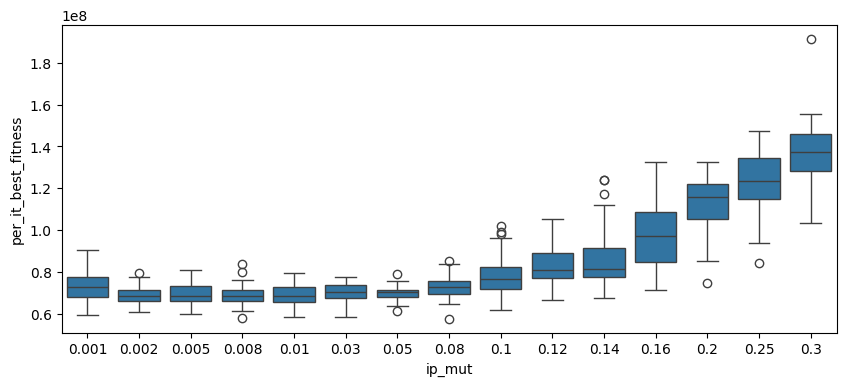

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(ax=ax, data=fdf2, x="ip_mut", y="per_it_best_fitness")
plt.show()

fig = ax.get_figure()
fig.savefig("boxplot_end.png") 